<a href="https://colab.research.google.com/github/jaydigy/jayg_colab_gate/blob/main/ak_makemore_pt2_by_jayg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
!wget "https://raw.githubusercontent.com/jaydigy/jayg_colab_gate/main/names.txt"

--2023-05-11 12:25:45--  https://raw.githubusercontent.com/jaydigy/jayg_colab_gate/main/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt.1’

names.txt.1         100%[===================>] 222.80K  --.-KB/s    in 0.02s   

2023-05-11 12:25:45 (10.6 MB/s) - ‘names.txt.1’ saved [228145/228145]



In [24]:
#read all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [25]:
len(words)

32033

In [ ]:
# build the vocabliry of characters and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
# .stoi
itos = {i:s for s, i in stoi.items()}
# itos1 = {s:i for s, i in stoi.items()}
# print(stoi)
# print(stoi.items())
# print(itos1)
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [26]:
# build the dataset
block_size = 3 # context length : how many characters do we take for next one ?
X, Y = [], []
#for w in words[:5]:
for w in words:

    #print(w)
    context=[0] * block_size
    # print(context)
    for ch in w + '.':
        #print('context:', context)
        ix = stoi[ch]
        #print('ix:', ix)
        X.append(context)
        #print('X:', X)
        Y.append(ix)
        #print('Y:', Y)
        #print(''.join(itos[i] for i in context), '------>', itos[ix])
        #print('i:')
        #print('context[1:]:', context[1:])
        context = context[1:] + [ix] #crop and append
    
X = torch.tensor(X)
Y = torch.tensor(Y)


In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [ ]:
C = torch.randn((27,2))

In [ ]:
C[5]

tensor([ 0.0659, -0.8454])

In [ ]:
F.one_hot(torch.tensor(5), num_classes =27).float() @ C

tensor([-0.2456,  0.6554])

In [ ]:
C[[5,6,7,]]

tensor([[ 0.0659, -0.8454],
        [ 0.0141,  1.1707],
        [-2.0380,  1.0688]])

In [ ]:
C[X].shape

torch.Size([32, 3, 2])

In [ ]:
X[13,2]

tensor(1)

In [ ]:
C[X][13,2]

tensor([1.7405, 1.5769])

In [ ]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
torch.cat((emb[:,0,:], emb[:,1,:], emb[:,2,:]), 1).shape

torch.Size([32, 6])

In [ ]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [ ]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [ ]:
a.shape

torch.Size([18])

In [ ]:
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [ ]:
a.storage()

<ipython-input-23-d39b3459ecdd>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()
/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/torch/storage.py:645: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
a.view(3,3,2).storage()

<ipython-input-24-3072bc567fc2>:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.view(3,3,2).storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [ ]:
emb.view(32,6)

tensor([[-0.6946, -1.4146, -0.6946, -1.4146, -0.6946, -1.4146],
        [-0.6946, -1.4146, -0.6946, -1.4146,  0.0659, -0.8454],
        [-0.6946, -1.4146,  0.0659, -0.8454,  0.9118, -0.7653],
        [ 0.0659, -0.8454,  0.9118, -0.7653,  0.9118, -0.7653],
        [ 0.9118, -0.7653,  0.9118, -0.7653,  1.7405,  1.5769],
        [-0.6946, -1.4146, -0.6946, -1.4146, -0.6946, -1.4146],
        [-0.6946, -1.4146, -0.6946, -1.4146, -0.5949, -0.8095],
        [-0.6946, -1.4146, -0.5949, -0.8095, -1.5494, -0.0671],
        [-0.5949, -0.8095, -1.5494, -0.0671,  1.3802, -1.9001],
        [-1.5494, -0.0671,  1.3802, -1.9001,  0.0575, -0.1423],
        [ 1.3802, -1.9001,  0.0575, -0.1423,  1.3802, -1.9001],
        [ 0.0575, -0.1423,  1.3802, -1.9001,  1.7405,  1.5769],
        [-0.6946, -1.4146, -0.6946, -1.4146, -0.6946, -1.4146],
        [-0.6946, -1.4146, -0.6946, -1.4146,  1.7405,  1.5769],
        [-0.6946, -1.4146,  1.7405,  1.5769,  0.0575, -0.1423],
        [ 1.7405,  1.5769,  0.0575, -0.1

In [ ]:
h = emb.view(emb.shape[0], 6) @ W1 + b1 # emb.shape(0) 은 -1로 써두 된다. 

In [ ]:
h = torch.tanh(h)
h

tensor([[-0.6796,  1.0000, -0.4748,  ..., -0.6973, -0.2011, -0.9290],
        [-0.6169,  1.0000,  0.2521,  ...,  0.0565,  0.1818, -0.8550],
        [-0.8813,  1.0000,  0.1891,  ...,  0.9288, -0.2897, -0.8844],
        ...,
        [-0.9858,  0.2639,  0.9748,  ...,  0.7361,  0.9196, -0.7024],
        [ 0.9984,  0.5948, -0.4856,  ..., -0.9530, -0.9950, -0.9415],
        [-0.9506,  0.9978,  0.7401,  ...,  1.0000,  0.9758, -0.9498]])

In [ ]:
b1.shape

torch.Size([100])

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([32, 27])

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts / counts.sum(1, keepdims=True)

In [ ]:
prob.shape

torch.Size([32, 27])

In [ ]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [ ]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(18.7657)

각 코드종합 - 유투브 32:36

In [ ]:
X.shape, Y.shape #dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [27]:
g = torch.Generator().manual_seed(2147483647) #for reporucibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [28]:
sum(p.nelement() for p in parameters) # number of parameters in total 

3481

In [29]:
for p in parameters:
    p.requires_grad = True

In [38]:
for _ in range(100):

    #minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))

    #forward pass
    emb = C[X[ix]]  #(32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32, 100)
    logits = h @ W2 +b2 # (32, 37)
    #counts = logits.exp()
    #probs = counts / counts.sum(1, keepdims = True)
    #loss = -probs[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix]) # 위 3개의 열이 다음의 cross_entropy 하나로 계산될 수 있다. 
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad  = None
    loss.backward()

    #update 
    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

2.5166420936584473


In [ ]:
torch.randint(0, X.shape[0], (32,))

tensor([141649,  30877, 226826, 129892,   3233, 146500, 116175,  96350,  19439,
        177031,  23113,  15527, 152170,  11135, 126513,  87623, 145778, 225628,
        109263,  84430,  64889, 151354, 212255, 220988,  70014,  19785, 130225,
        189120,  63915, 202684, 122905,  73762])

In [ ]:
logits.max(1)

torch.return_types.max(
values=tensor([11.3564, 13.4371, 18.7621, 17.3656, 14.0002, 11.3564, 13.2120, 11.4477,
        13.6701, 15.9577, 12.8196, 17.9280, 11.3564, 13.6379, 14.5011, 16.0014,
        11.3564, 13.8758, 12.1043, 13.5104, 16.3694, 13.0214,  8.1132,  8.2464,
        13.9033, 11.3564, 13.6566, 13.9198, 11.4311, 14.4014, 16.1431, 13.0896],
       grad_fn=<MaxBackward0>),
indices=tensor([ 1, 13, 13,  1,  0,  1, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  1, 19,
         1,  2,  5, 12, 12,  1,  0,  1, 15, 16,  8,  9,  1,  0]))

In [ ]:
#logits = torch.tensor([-5, -3, 0, 100]) - 100
#counts = logits.exp()
#probs = counts / counts.sum()
#probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [ ]:
#counts

tensor([4.5400e-05, 3.3546e-04, 6.7379e-03, 1.0000e+00])

In [ ]:
# 유투브 44:39 런닝 레이트를 정하는 방법 정리

In [77]:
g = torch.Generator().manual_seed(2147483647) #for reporucibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [78]:
sum(p.nelement() for p in parameters) # number of parameters in total 

3481

In [79]:
for p in parameters:
    p.requires_grad = True

In [80]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
# lrs

In [82]:
lri = []
lossi =[]

for i in range(1000):

    #minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))

    #forward pass
    emb = C[X[ix]]  #(32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32, 100)
    logits = h @ W2 +b2 # (32, 37)
    loss = F.cross_entropy(logits, Y[ix]) # 위 3개의 열이 다음의 cross_entropy 하나로 계산될 수 있다. 
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad  = None
    loss.backward()

    #update 
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    #track_size
    lri.append(lre[i])
    lossi.append(loss.item())
print(loss.item())

6.415245056152344


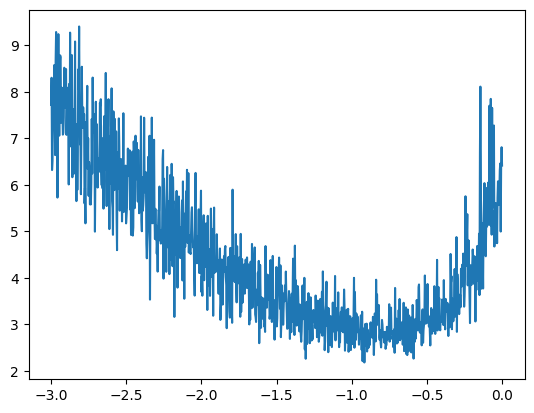

In [83]:
plt.plot(lri, lossi)

In [58]:
emb = C[X]  #(32, 3, 2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32, 100)
logits = h @ W2 +b2 # (32, 37)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.7252, grad_fn=<NllLossBackward0>)

In [ ]:
# 유투브 56:00 오버피팅 방지 위해 트레인 데이타 80%, 밸리데이션 10%, 테스트 10% 나누는 방법

In [ ]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [102]:
# build the dataset

def build_dataset(words):
    block_size = 3 # context length : how many characters do we take for next one ?
    X, Y = [], []

    for w in words:

        #print(w)
        context=[0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '------>', itos[ix])
            context = context[1:] + [ix] #crop and append
        
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [91]:
n1

25626

In [92]:
n2

28829

In [93]:
n2-n1

3203

In [94]:
len(words)-n2

3204

In [103]:
Xtr.shape, Ytr.shape #dataset

(torch.Size([182437, 3]), torch.Size([182437]))

In [136]:
g = torch.Generator().manual_seed(2147483647) #for reporucibility
# C = torch.randn((27, 2), generator=g)
C = torch.randn((27, 10), generator=g)
# W1 = torch.randn((6, 100), generator=g)
# W1 = torch.randn((6, 300), generator=g)
W1 = torch.randn((30, 200), generator=g)
# b1 = torch.randn(100, generator=g)
# b1 = torch.randn(300, generator=g)
b1 = torch.randn(200, generator=g)
# W2 = torch.randn((100, 27), generator=g)
# W2 = torch.randn((300, 27), generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [120]:
g = torch.Generator().manual_seed(2147483647) #for reporucibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [137]:
sum(p.nelement() for p in parameters) # number of parameters in total 

11897

In [138]:
for p in parameters:
    p.requires_grad = True

In [98]:
# lre = torch.linspace(-3, 0, 1000)
# lrs = 10**lre

In [139]:
lri = []
lossi =[]
stepi = []

In [150]:

for i in range(200000):

    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    #forward pass
    emb = C[Xtr[ix]]  #(32, 3, 2)
    # h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32, 100)
    h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(32, 100)
    logits = h @ W2 +b2 # (32, 37)
    loss = F.cross_entropy(logits, Ytr[ix]) # 위 3개의 열이 다음의 cross_entropy 하나로 계산될 수 있다. 
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad  = None
    loss.backward()

    #update 
    # lr = 0.01
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #track_size
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
    # lossi.append(loss.item())
print(loss.item())

2.388546943664551


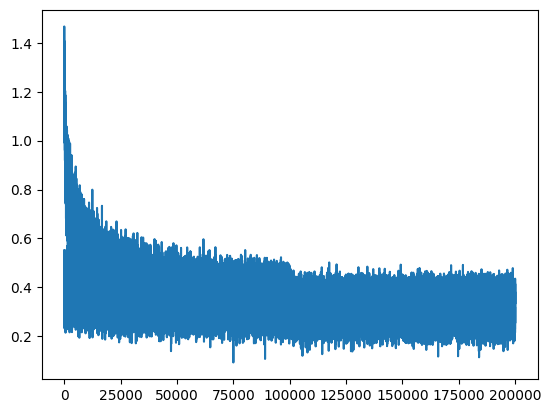

In [151]:
plt.plot(stepi, lossi)

In [152]:
emb = C[Xtr]  #(32, 3, 2)
# h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32, 100)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(32, 100)
logits = h @ W2 +b2 # (32, 37)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1080, grad_fn=<NllLossBackward0>)

In [153]:
emb = C[Xdev]  #(32, 3, 2)
# h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32, 100)
h = torch.tanh(emb.view(-1,30) @ W1 + b1) #(32, 100)
logits = h @ W2 +b2 # (32, 37)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1595, grad_fn=<NllLossBackward0>)

In [ ]:
# 일반적으로 train과 dev의 loss 차이가 거의 없고, dev가 약간 높을때(overfitting) 학습 멈추고, 
# test데이터 넣어서 1번만 돌리고 논문제출하는것임

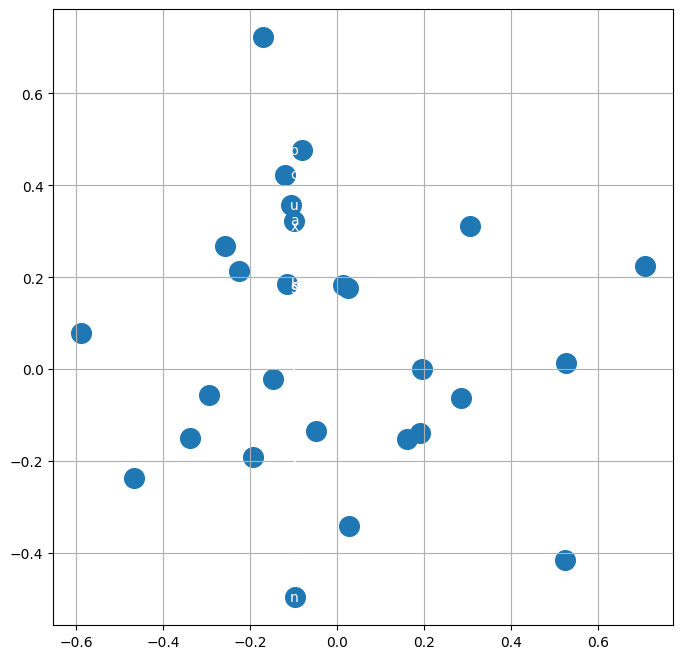

In [154]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[1,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [160]:
#sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context=[0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0 :
            break
        
    print(''.join(itos[i] for i in out))



                                  

mora.
kayah.
see.
med.
rylle.
emmadiejd.
leg.
azeer.
melin.
shy.
jen.
eden.
van.
nar.
kayzion.
kamin.
shabergiad.
jess.
jairenly.
panthona.
